# Inspect NLVR Dataset

## Downloads
In Colab download only once per session.

In [0]:
# Download NLVR Images
!wget http://clic.nlp.cornell.edu/resources/NLVR2/train_img.zip

--2019-04-06 08:14:15--  http://clic.nlp.cornell.edu/resources/NLVR2/train_img.zip
Resolving clic.nlp.cornell.edu (clic.nlp.cornell.edu)... 128.253.49.36
Connecting to clic.nlp.cornell.edu (clic.nlp.cornell.edu)|128.253.49.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10963360551 (10G) [application/zip]
Saving to: ‘train_img.zip’

train_img.zip       100%[===================>]  10.21G  33.2MB/s    in 5m 20s  

2019-04-06 08:19:35 (32.7 MB/s) - ‘train_img.zip’ saved [10963360551/10963360551]



In [0]:
!wget http://clic.nlp.cornell.edu/resources/NLVR2/dev_img.zip

--2019-04-06 08:19:37--  http://clic.nlp.cornell.edu/resources/NLVR2/dev_img.zip
Resolving clic.nlp.cornell.edu (clic.nlp.cornell.edu)... 128.253.49.36
Connecting to clic.nlp.cornell.edu (clic.nlp.cornell.edu)|128.253.49.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 846824822 (808M) [application/zip]
Saving to: ‘dev_img.zip’

dev_img.zip         100%[===================>] 807.59M  34.4MB/s    in 25s     

2019-04-06 08:20:03 (31.7 MB/s) - ‘dev_img.zip’ saved [846824822/846824822]



In [0]:
!wget http://clic.nlp.cornell.edu/resources/NLVR2/test1_img.zip

--2019-04-06 08:20:04--  http://clic.nlp.cornell.edu/resources/NLVR2/test1_img.zip
Resolving clic.nlp.cornell.edu (clic.nlp.cornell.edu)... 128.253.49.36
Connecting to clic.nlp.cornell.edu (clic.nlp.cornell.edu)|128.253.49.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 846345997 (807M) [application/zip]
Saving to: ‘test1_img.zip’

test1_img.zip       100%[===================>] 807.14M  34.6MB/s    in 26s     

2019-04-06 08:20:31 (31.1 MB/s) - ‘test1_img.zip’ saved [846345997/846345997]



In [0]:
# Unzip Files
!unzip -q train_img.zip

In [0]:
!unzip -q dev_img.zip

In [0]:
!unzip -q test1_img.zip

## Imports

In [0]:
import sys
import pandas as pd
import os, fnmatch
# from IPython.display import Image, display
from PIL import Image, ImageOps
import ipywidgets as w

def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [1]:
!wget https://raw.githubusercontent.com/clic-lab/nlvr/master/nlvr2/data/train.json

--2019-05-08 11:19:38--  https://github.com/clic-lab/nlvr/blob/master/nlvr2/data/train.json?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/clic-lab/nlvr/raw/master/nlvr2/data/train.json [following]
--2019-05-08 11:19:39--  https://github.com/clic-lab/nlvr/raw/master/nlvr2/data/train.json
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/clic-lab/nlvr/master/nlvr2/data/train.json [following]
--2019-05-08 11:19:39--  https://raw.githubusercontent.com/clic-lab/nlvr/master/nlvr2/data/train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting 

In [0]:
# Datafreame Pandas
df = pd.read_json('train.json', lines=True)
identifier_df = df['identifier'].str.extract('(?P<set_id>\d{4,})-(?P<pair_id>\d)-(?P<sentence_id>\d)', expand=True)
df['set_id'] = identifier_df['set_id']
df['pair_id'] = identifier_df['pair_id']
df['sentence_id'] = identifier_df['sentence_id']

ValueError: ignored

## Sample and Extract Image Pair and Sentence

In [0]:
# Take one sample
sample = df.sample()

# sample_values : pandas.core.series.Series
sample_values = sample.iloc[0]
sample_set_id = sample_values['set_id']
sample_pair_id = sample_values['pair_id']
sample_sentence_id = sample_values['sentence_id']
sample_lookup = '*-' + sample_set_id + '-' + sample_pair_id + '*'

# Image Lookup
sample_path_0 = find(sample_lookup, 'images')[0]
sample_path_1 = find(sample_lookup, 'images')[1]
sample_sentence = sample['sentence'].iloc[0]
sample_label = sample['label'].iloc[0]

# img0, img1 : IPython.core.display.Image
img_0 = Image.open(sample_path_0)
img_1 = Image.open(sample_path_1)

# Resize like when displayed to the workers during sentence-writing
size = (530, 416)
img_res_0 = ImageOps.fit(img_0, size, Image.ANTIALIAS)
img_res_1 = ImageOps.fit(img_1, size, Image.ANTIALIAS)

images = [img_res_0, img_res_1]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

pair_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  pair_im.paste(im, (x_offset,0))
  x_offset += 1+im.size[0]

## Show images and sentence

Each sink featured has only one bowl, and one faucet.


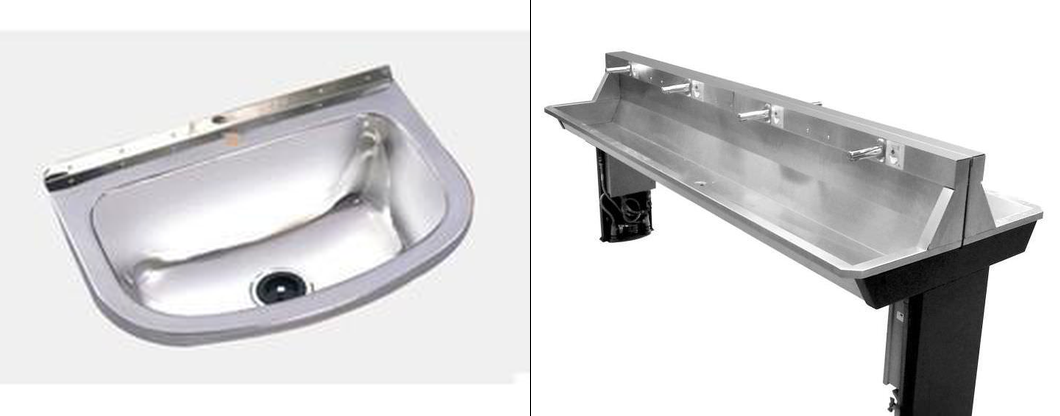

In [0]:
# Print sentence and image pair
print(sample_sentence)
pair_im

In [0]:
# Print label
print(sample_label)

False


In [0]:
# Debugging: print dataset row
sample

,directory,extra_validations,identifier,label,left_url,query,right_url,sentence,synset,validation,writer,set_id,pair_id,sentence_id
82068,71,NaN,train-6031-2-0,False,http://img.archiexpo.com/images_ae/photo-g/654...,three washbasins41,https://5.imimg.com/data5/AR/DS/MY-8032915/sta...,"Each sink featured has only one bowl, and one ...",washbasin,{'107': 'False'},129,6031,2,0


In [0]:
# Debugging_ print images path
print(sample_path_0, sample_path_1)

images/train/71/train-6031-2-img1.png images/train/71/train-6031-2-img0.png


In [0]:
# Debugging URLs
sample_values['left_url']

'http://img.archiexpo.com/images_ae/photo-g/65403-6464525.jpg'

In [0]:
# Debugging URLs
sample_values['right_url']

'https://5.imimg.com/data5/AR/DS/MY-8032915/stainless-steel-wash-basin-21x14-inch-250x250.jpg'